In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/VINAY KUMAR PATEL/Downloads/machine learning/heart_disease_classification_dataset.csv",header=0)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


# pre processing

In [5]:
# Drop rows with missing values
data_cleaned = df.dropna()


In [6]:
# Create dummy variables for 'sex' and 'target'
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True).astype(int)

In [7]:
# Renaming columns for clarity
data_cleaned.rename(columns={'fbs': 'Smoking', 'target_yes': 'Lung_Cancer'}, inplace=True)


In [8]:
data_cleaned.describe()

,age,cp,trestbps,chol,Smoking,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_male,Lung_Cancer
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.348123,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,0.778157,1.392491,0.730375,2.320819,0.689420,0.546075
std,9.182042,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.083153,0.618946,1.029862,0.613331,0.463523,0.498724
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000,1.000000


In [9]:
data_cleaned.head()

,age,cp,trestbps,chol,Smoking,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_male,Lung_Cancer
0,63,3,145,233,1,0,150,0,2,0,0,1,1,1
1,37,2,130,250,0,1,187,0,3,0,0,2,1,1
2,41,1,130,204,0,0,172,0,1,2,0,2,0,1
3,56,1,120,236,0,1,178,0,0,2,0,2,1,1
5,57,0,140,192,0,1,148,0,0,1,0,1,1,1


In [10]:
x=data_cleaned.loc[:,data_cleaned.columns!="Lung_Cancer"]

In [14]:
x.head()

,age,cp,trestbps,chol,Smoking,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_male
0,63,3,145,233,1,0,150,0,2,0,0,1,1
1,37,2,130,250,0,1,187,0,3,0,0,2,1
2,41,1,130,204,0,0,172,0,1,2,0,2,0
3,56,1,120,236,0,1,178,0,0,2,0,2,1
5,57,0,140,192,0,1,148,0,0,1,0,1,1


In [21]:
y=data_cleaned['Lung_Cancer']

In [23]:
y.head()

0    1
1    1
2    1
3    1
5    1
Name: Lung_Cancer, dtype: int32

# test train split

In [27]:
from  sklearn.model_selection  import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
x_train.shape

(234, 13)

In [33]:
x_test.shape

(59, 13)

# tree making

In [36]:
from sklearn import tree
cls_tree=tree.DecisionTreeClassifier(max_depth=3)
cls_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

# predicting value

In [39]:
y_train_pred= cls_tree.predict(x_train)
y_train_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [41]:
y_test_pred= cls_tree.predict(x_test)
y_test_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [45]:
confusion_matrix(y_train , y_train_pred )

array([[ 74,  27],
       [ 14, 119]], dtype=int64)

In [47]:
confusion_matrix(y_test , y_test_pred )

array([[18, 14],
       [10, 17]], dtype=int64)

In [49]:
accuracy_score(y_train , y_train_pred )

0.8247863247863247

In [51]:
accuracy_score(y_test , y_test_pred )

0.5932203389830508

# ploting decision tree

In [54]:
dot_data = tree.export_graphviz(cls_tree,out_file = None,feature_names =x_train.columns,filled= True)

In [56]:
from IPython.display import Image

In [58]:
import pydotplus

In [60]:
graph= pydotplus.graph_from_dot_data(dot_data)

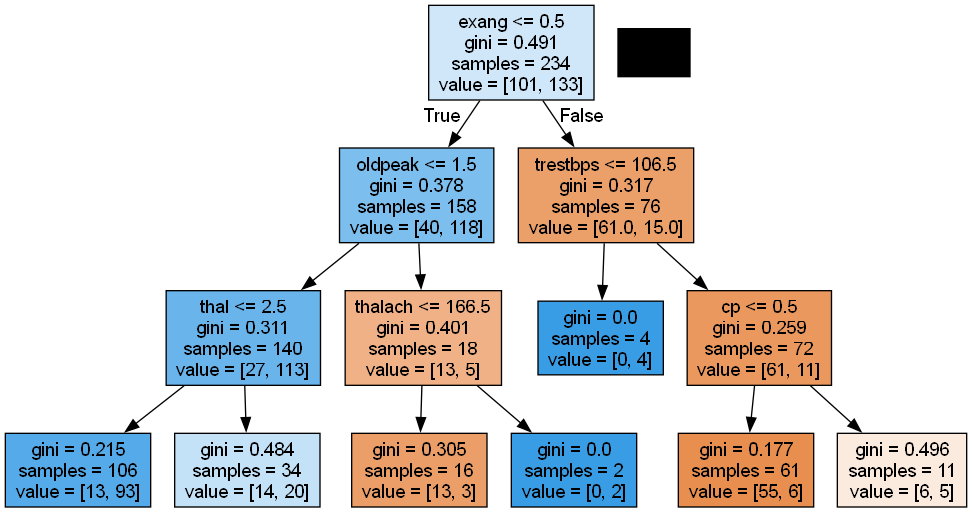

In [62]:
Image(graph.create_png())

# bagging 

In [63]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier()

In [76]:
from sklearn.ensemble import BaggingClassifier

In [89]:
bag_clf = BaggingClassifier(estimator = clftree,n_estimators =1000,bootstrap= True,n_jobs=-1,random_state=42)

In [91]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [93]:
confusion_matrix(y_test , y_test_pred )

array([[18, 14],
       [10, 17]], dtype=int64)

In [95]:
accuracy_score(y_test , y_test_pred )

0.5932203389830508

In [97]:
accuracy_score(y_train , y_train_pred )

0.8247863247863247

# random forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf_clf = RandomForestClassifier(n_estimators = 1000,n_jobs=-1,random_state=42)

In [109]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [111]:
accuracy_score(y_test , y_test_pred )

0.5932203389830508

In [113]:
accuracy_score(y_train , y_train_pred )

0.8247863247863247

# gradient boost

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
gbc_clf= GradientBoostingClassifier(learning_rate=0.2,n_estimators = 1000,max_depth=1)

In [125]:
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=1000)

In [131]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.8305084745762712

In [133]:
accuracy_score(y_train,gbc_clf.predict(x_train))

0.9871794871794872

# ada boost

In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [147]:
ada_clf= AdaBoostClassifier(n_estimators = 5000)

In [149]:
ada_clf.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=5000)

In [151]:
accuracy_score(y_test,ada_clf.predict(x_test))

0.711864406779661

In [153]:
accuracy_score(y_train,gbc_clf.predict(x_train))

0.9871794871794872

In [157]:
ada_clf_1= AdaBoostClassifier(n_estimators = 500)
ada_clf_1.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=500)

In [161]:
accuracy_score(y_test,ada_clf_1.predict(x_test))

0.7457627118644068

In [163]:
accuracy_score(y_train,gbc_clf.predict(x_train))

0.9871794871794872

# xg boost

In [171]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [209]:
import xgboost as xgb

In [211]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=1000,learning_rate=0.2)

In [213]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [215]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.7966101694915254

In [217]:
accuracy_score(y_train,xgb_clf.predict(x_train))

1.0

In [229]:
xgb_clf2=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.2)

In [231]:
xgb_clf2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [233]:
accuracy_score(y_train,xgb_clf2.predict(x_train))

1.0

In [235]:
accuracy_score(y_test,xgb_clf2.predict(x_test))

0.7966101694915254

In [219]:
xgb_clf3=xgb.XGBClassifier(max_depth=5,n_estimators=1000,learning_rate=0.2)

In [221]:
xgb_clf3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [223]:
accuracy_score(y_test,xgb_clf3.predict(x_test))

0.7966101694915254

In [227]:
accuracy_score(y_train,xgb_clf3.predict(x_train))

1.0